# Modeling 

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from lightgbm import LGBMClassifier
from sklearn.metrics import roc_curve

In [16]:
import os 
import sys
sys.path.append(os.path.join(os.path.abspath('..')))

In [28]:
import src.data_loading as dl
import scripts.feature_enigneering as fe

In [29]:
output_data = '../data/cleaned'
df = pd.read_csv(output_data + '/woe_data.csv')
df.sample(4)

,CustomerId_Value_max,TransactionStartTime_Is_month_end,TransactionStartTime_Dayofweek,meanTransactionPercustomer,ProviderId,CustomerId_ProductCategory_Value_mean,CustomerId,CustomerId_ProductCategory_Value_max,TransactionStartTime_Is_quarter_end,ProductId_ProductCategory,...,CustomerId_TransactionId_ct,CustomerId_ProductCategory_Value_min,TransactionStartTime_Dayofyear,pc2,AccountId,TransactionStartTime_Day,Recency_woe,MonetaryTotal_woe,Frequency_woe,MonetaryAvg_woe
1160,1000.0,0,1,2.0,0,1000.000000,1160,1000,0,15_financial_services,...,1.0,1000,338,0.598008,1560,4,5.441231,1.484839,1.999978,0.201222
475,1000.0,0,0,2.0,0,750.000000,475,1000,0,15_financial_services,...,2.0,500,7,0.388434,626,7,5.441231,1.484839,1.999978,0.201222
1254,11000.0,0,4,2.0,2,8954.545455,1254,11000,0,10_airtime,...,34.0,1000,355,0.353387,1689,21,-2.766593,-0.737983,-0.474921,-0.011868
330,20000.0,0,4,2.0,0,7533.333333,330,20000,0,15_financial_services,...,11.0,200,320,0.703793,431,16,3.228924,-0.737983,0.786713,-0.011868


In [30]:
df.columns

Index(['CustomerId_Value_max', 'TransactionStartTime_Is_month_end',
       'TransactionStartTime_Dayofweek', 'meanTransactionPercustomer',
       'ProviderId', 'CustomerId_ProductCategory_Value_mean', 'CustomerId',
       'CustomerId_ProductCategory_Value_max',
       'TransactionStartTime_Is_quarter_end', 'ProductId_ProductCategory',
       'TransactionStartTime_Is_year_start',
       'CustomerId_ProductCategory_Value_std',
       'CustomerId_ProductId_Value_min', 'CustomerId_ProductId_Value_max',
       'BatchId', 'TransactionStartTime_Elapsed', 'AverageTransactionAmount',
       'TransactionStartTime_Is_month_start', 'CustomerId_ProductCategory_ct',
       'CustomerId_ProductCategory_Value_Ratio', 'CustomerId_FE', 'Value',
       'TransactionStartTime_Minute', 'TransactionStartTime_Is_quarter_start',
       'CustomerId_Value_min', 'Value_Mean_Minus', 'RFMS_Score',
       'ProductCategory', 'SubscriptionId', 'TotalTransactionAmount',
       'CustomerId_Value_std', 'TransactionStartTi

In [31]:
selected_columns = ['TransactionStartTime_Day', 'TransationCount', 'StdTransactionAmount', 
                    'TransactionStartTime_Month', 'AverageTransactionAmount', 'Value', 
                    'TransactionStartTime_Hour', 'FraudResult', 'Amount', 'PricingStrategy', 
                    'MonetaryTotal_woe', 'MonetaryAvg_woe', 'Frequency_woe', 'Recency_woe', 'label']
data = df[selected_columns]

In [32]:
data.sample(3)

,TransactionStartTime_Day,TransationCount,StdTransactionAmount,TransactionStartTime_Month,AverageTransactionAmount,Value,TransactionStartTime_Hour,FraudResult,Amount,PricingStrategy,MonetaryTotal_woe,MonetaryAvg_woe,Frequency_woe,Recency_woe,label
1024,16,20,1665.530183,11,1297.500000,1000,11,0,1000.0,2,0.520992,0.201222,-0.474921,5.441231,bad
1903,15,143,6084.371311,11,2211.960839,1000,16,0,1000.0,3,-1.534100,-0.225366,-1.955104,-2.766593,good
1771,22,9,1016.021653,12,440.000000,1000,20,0,1000.0,2,1.484839,0.201222,0.786713,3.228924,bad


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3742 entries, 0 to 3741
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   TransactionStartTime_Day    3742 non-null   int64  
 1   TransationCount             3742 non-null   int64  
 2   StdTransactionAmount        3742 non-null   float64
 3   TransactionStartTime_Month  3742 non-null   int64  
 4   AverageTransactionAmount    3742 non-null   float64
 5   Value                       3742 non-null   int64  
 6   TransactionStartTime_Hour   3742 non-null   int64  
 7   FraudResult                 3742 non-null   int64  
 8   Amount                      3742 non-null   float64
 9   PricingStrategy             3742 non-null   int64  
 10  MonetaryTotal_woe           3742 non-null   float64
 11  MonetaryAvg_woe             3742 non-null   float64
 12  Frequency_woe               3742 non-null   float64
 13  Recency_woe                 3742 

In [46]:
le = LabelEncoder()
data['label'] = data.loc[:, 'label'] = le.fit_transform(data['label'])

C:\Users\Hp\AppData\Local\Temp\ipykernel_19320\2382036636.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['label'] = data.loc[:, 'label'] = le.fit_transform(data['label'])


In [47]:
data.sample()

,TransactionStartTime_Day,TransationCount,StdTransactionAmount,TransactionStartTime_Month,AverageTransactionAmount,Value,TransactionStartTime_Hour,FraudResult,Amount,PricingStrategy,MonetaryTotal_woe,MonetaryAvg_woe,Frequency_woe,Recency_woe,label
1129,12,1,0.0,12,10000.0,10000,20,0,10000.0,2,1.484839,0.688407,1.999978,5.441231,0


### 1. Split the data into training and testing sets:

In [48]:
# Features (X) and Target (y)
X = data.drop('label', axis=1)  
y = data['label']  # label

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 2993 samples
Testing set: 749 samples


### 2. Train the models:

In [49]:
# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
# Decision Trees
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
# GradientBoostingClassifier
gbm_model = GradientBoostingClassifier(random_state=42)
gbm_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

In [ ]:
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

### 3. Hyperparameter tuning: I'll use Grid Search for hyperparameter tuning.

In [ ]:
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
# Logistic Regression
param_grid_lr = {'C': [0.1, 1, 10]}
grid_search_lr = GridSearchCV(lr_model, param_grid_lr, cv=5)
grid_search_lr.fit(X_train, y_train)

# Decision Trees
param_grid_dt = {'max_depth': [3, 5, 10]}
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5)
grid_search_dt.fit(X_train, y_train)

# Random Forest
param_grid_rf = {'max_depth': [3, 5, 10], 'n_estimators': [50, 100, 200]}
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)

# GradientBoostingClassifier
param_grid_gbm = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'max_depth': [3, 5, 10]}
grid_search_gbm = GridSearchCV(gbm_model, param_grid_gbm, cv=5)
grid_search_gbm.fit(X_train, y_train)

# LGBMClassifier
param_grid_lgbm = {'learning_rate': [0.01, 0.1, 0.2], 'n_estimators': [50, 100, 200], 'num_leaves': [31, 50, 100]}
grid_search_lgbm = GridSearchCV(lgbm_model, param_grid_lgbm, cv=5)
grid_search_lgbm.fit(X_train, y_train)

### 4. Model evaluation: I'll use Accuracy, Precision, Recall, F1 Score, and ROC-AUC to evaluate the models.

Logistic Regression

In [57]:
# Logistic Regression
y_pred_lr = grid_search_lr.best_estimator_.predict(X_test)
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr))
print("Recall:", recall_score(y_test, y_pred_lr))
print("F1 Score:", f1_score(y_test, y_pred_lr))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lr))

Logistic Regression:
Accuracy: 0.8838451268357811
Precision: 0.6829268292682927
Recall: 0.27450980392156865
F1 Score: 0.3916083916083916
ROC-AUC: 0.6272085341091614


Decision Trees

In [58]:
# Decision Trees
y_pred_dt = grid_search_dt.best_estimator_.predict(X_test)
print("Decision Trees:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Precision:", precision_score(y_test, y_pred_dt))
print("Recall:", recall_score(y_test, y_pred_dt))
print("F1 Score:", f1_score(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_dt))

Decision Trees:
Accuracy: 0.9465954606141522
Precision: 0.7870370370370371
Recall: 0.8333333333333334
F1 Score: 0.8095238095238095
ROC-AUC: 0.8988923235445647


Random Forest

In [59]:
# Random Forest
y_pred_rf = grid_search_rf.best_estimator_.predict(X_test)
print("Random Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Precision:", precision_score(y_test, y_pred_rf))
print("Recall:", recall_score(y_test, y_pred_rf))
print("F1 Score:", f1_score(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_rf))

Random Forest:
Accuracy: 0.945260347129506
Precision: 0.8588235294117647
Recall: 0.7156862745098039
F1 Score: 0.7807486631016043
ROC-AUC: 0.848569566930327


GradientBoostingClassifier

In [56]:
# GradientBoostingClassifier
y_pred_gbm = grid_search_gbm.best_estimator_.predict(X_test)
print("Gradient Boost:")
print("Accuracy:", accuracy_score(y_test, y_pred_gbm))
print("Precision:", precision_score(y_test, y_pred_gbm))
print("Recall:", recall_score(y_test, y_pred_gbm))
print("F1 Score:", f1_score(y_test, y_pred_gbm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_gbm))

Gradient Boost:
Accuracy: 0.951935914552737
Precision: 0.8
Recall: 0.8627450980392157
F1 Score: 0.8301886792452831
ROC-AUC: 0.9143710034245538


LGBMClassifier

In [60]:
# LGBMClassifier
y_pred_lgbm = grid_search_lgbm.best_estimator_.predict(X_test)
print("LGBMClassifier:")
print("Accuracy:", accuracy_score(y_test, y_pred_lgbm))
print("Precision:", precision_score(y_test, y_pred_lgbm))
print("Recall:", recall_score(y_test, y_pred_lgbm))
print("F1 Score:", f1_score(y_test, y_pred_lgbm))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_lgbm))

LGBMClassifier:
Accuracy: 0.951935914552737
Precision: 0.8173076923076923
Recall: 0.8333333333333334
F1 Score: 0.8252427184466019
ROC-AUC: 0.9019835136527563


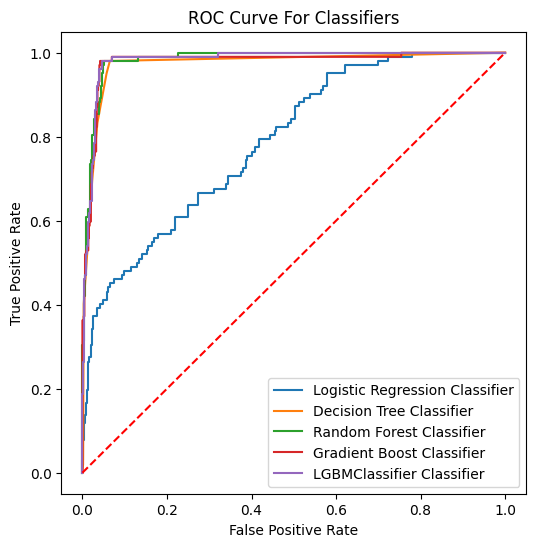

In [61]:
# Define models
models = {
    'Logistic Regression': grid_search_lr.best_estimator_,
    'Decision Tree': grid_search_dt.best_estimator_,
    'Random Forest': grid_search_rf.best_estimator_,
    'Gradient Boost': grid_search_gbm.best_estimator_,
    'LGBMClassifier': grid_search_lgbm.best_estimator_
}

# Function to plot ROC curves
def plot_roc_curves(X_test, y_test, models):
    plt.figure(figsize=(6,6))  # Create a single figure

    for model_name, clf in models.items():
        # Classifier predictions
        y_pred_proba = clf.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{model_name} Classifier')

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], color='red', linestyle='--')

    # Add label and title 
    plt.title("ROC Curve For Classifiers")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

# Plot ROC curves
plot_roc_curves(X_test, y_test, models)

In [62]:
# Save the model
import pickle

with open('model.pkl', 'wb') as f:
    pickle.dump(grid_search_gbm.best_estimator_, f)

In [65]:
sample1 = np.array([9, 1, 0.000000, 12, 100000.000000, 100000, 16, 0, 100000.0, 
                    2, 0.520992, -0.011868, 1.999978, 2.064876]).reshape(1, -1)

grid_search_gbm.best_estimator_.predict(sample1)

c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


array([0])

In [66]:
proba = grid_search_gbm.best_estimator_.predict_proba(sample1)
print(proba)

[[9.99453683e-01 5.46316922e-04]]


c:\Users\Hp\PycharmProjects\HelloWorld\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
